# 1.C: Frequentist analysis of the radioactivity experiment (1 parameter)

**Question:** What is the activity of this radioactive source? 

Since the outcome of the experiment is unpredictable, the answer to the question can only be probabilistic, not definitive. Instead of a single value, a range of possible values must be given (an *interval*) along with a probability qualifier.

The method you use depends on your precise definition of probability. This tutorial shows the approach for Frequentist probability.

In [1]:
# Import modules needed for this tutorial

from trisep.RadioactiveSource import RadioactiveSource
from trisep.RadiationCounter import RadiationCounter, SimulatedRadiationCounter

import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background') # only include this if you use a dark background for Jupyter Lab

## Frequentist confidence interval

Suppose the experiment records 6 decays in 10 seconds:
- For some values for activity, the observation (6 counts) would seem anomalous 
  - For example, if the activity was 2 Bq, it would seem unusual to record 6 (or fewer) decays in 10 seconds

Simulated detector built. Counting time = 10.0 Efficiency = 1.0 Background rate= 0.0 (Hz)


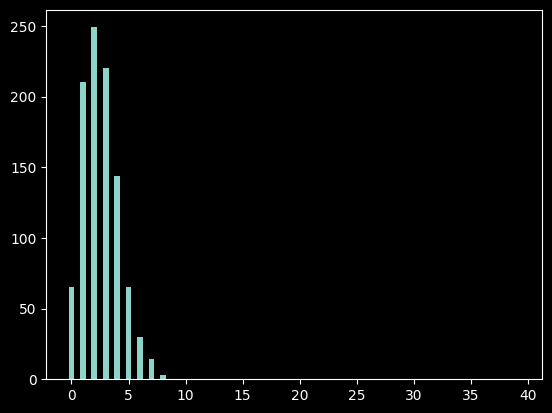

In [8]:
# Does it appear reasonable that the lab source activity is 0.6 Bq?
# Does it appear reasonable that the lab source activity is 2.0 Bq?

sim_source = RadioactiveSource(2.) # specifies the activity of simulated source
sim_detector = SimulatedRadiationCounter() # this is NOT the lab detector, just a simulation of a detector

sim_detector.insert_calibration_source(sim_source)
sim_detector.set_counting_time(10)

sim_counts = sim_detector.get_data(1000)

plt.hist(sim_counts,bins=np.arange(0.,40.,0.5), align='left')
plt.show()

The likelihood to see 6 or fewer counts from a source of activity 2 Bq appears to be small indeed. How can we quantify that?




In [3]:
# Look to see how often such a small number of counts occur:

sim_source.set_activity(2.)

observed = 6
trials = 100000
low_counts = 0

sim_data = sim_detector.get_data(trials)
# count how many times the simulated detector records 6 or fewer counts:
for i in range(trials):
    if sim_data[i] <= observed:
        low_counts += 1
    
print(observed,'or less counts occurred in',low_counts,'of',trials,'trials')

6 or less counts occurred in 18 of 100000 trials


### Quantifying anomalous behaviour: p-value

In frequentist statistics, the p-value is the probability of observing a result at least as extreme as the one actually observed, assuming that the null hypothesis is true.

In this case, the null hypothesis is that the source activity is 2 Bq.
The p-value is calculated as the fraction of trials that recorded 6 or fewer counts, given that the source activity is 2 Bq.

In [5]:
# calculate the p-value for the hypothesis that the source activity is 2 Bq
p_value = low_counts / trials
print('p-value for the hypothesis that the source activity is 2 Bq:', p_value)

p-value for the hypothesis that the source activity is 2 Bq: 0.00018


### Hypothesis test

If in advance of the experiment you decide that a p-value of 0.05 or less is sufficient to reject the hypothesis, then you can conclude that the hypothesis that the source activity is 2 Bq is rejected at the 95% confidence level (CL).

If the p-value is greater than 0.05, then the hypothesis is not rejected at the 95% CL.

## Upper confidence interval

A very small fraction of experiments with a 2 Bq source would see 6 or fewer counts in 10 seconds.

The study above is a one-sided test of the hypothesis that the source activity is 2 Bq.
 - one-sided: Alternative hypotheses under consideration have activities lower than 2 Bq.
 - in other words, only very low counts are considered to be anomalous

What activity values are not rejected at 95% CL?
 - Those activity values constitute the *95% upper confidence interval*, $[0,a^{upper}_{95}]$.

Confidence intervals are produced by following a recipe like this, decided upon before seeing data. The recipe is valid provided that
at least 95% of intervals contain the true value, if the model is correct.

For this example, if the true activity happens to be $a^{upper}_{95}$, the hypothesis test rejects the true hypothesis exactly 5% of repeated experiments. It is for those rare outcomes that the reported interval will not contain the true value, whereas the other experiments will report an interval containing the true value.

**Question**: What is the value of $a^{upper}_{95}$ for this example?

In [6]:
# Find the 95% upper confidence limit for the activity, given that 6 counts were recorded

# The 95% upper confidence limit is the activity value for which the p-value is 0.05
# The p-value is the fraction of trials that recorded 6 or fewer counts, given that the source activity is a certain value

def find_upper_confidence_limit(observed, trials, target_p_value):
    activity = 0.5 # Start with a low activity value
    while True:
        sim_source.set_activity(activity)
        sim_data = sim_detector.get_data(trials)
        low_counts = sum(1 for count in sim_data if count <= observed)
        p_value = low_counts / trials
        if p_value <= target_p_value:
            return activity
        activity += 0.001  # Increment activity to search for the upper limit

upper_limit_95 = find_upper_confidence_limit(observed, trials, 0.05)
print(f'95% upper confidence limit for the activity: {upper_limit_95:.3f} Bq')

95% upper confidence limit for the activity: 1.182 Bq


## Lower confidence interval and central confidence interval

Follow the same approach, this time considering alternative hypotheses having higher actvities.

The 95% lower confidence interval is $[a^{lower}_{95},\infty]$.

The 90% central confidence interval is $[a^{lower}_{95},a^{upper}_{95}]$.

## Frequentist central confidence interval - Summary

The 90% central confidence interval is bounded by the 95% confidence lower limit
and the 95% confidence level upper limit.

The interval is [0.26,1.18]. You can use tables (eg. page 280 of the reference notes) to find the bounds.

The result of this analysis can reported as $0.60^{+0.58}_{-0.34}$ at the 90% confidence level.

**Question**: Can you form a sentence that clearly explains what that means,
using the word "probability" and 90%?